In [1]:
from premise import *
from premise import __file__
from datapackage import Package
import bw2io as bw
import bw2data
bw2data.projects.set_current("ecoinvent-3.11-consequential")

Loading variables from /Users/romain/Github/premise/dev/variables.yaml
USER_DATA_BASE_DIR: test


In [2]:
bw2data.databases

Databases dictionary with 2 object(s):
	ecoinvent-3.11-biosphere
	ecoinvent-3.11-consequential

In [3]:
consequential_args = {
    "range time":False,
    "duration":False,
    "foresight":False,
    "lead time":False,
    "capital replacement rate":False,
    "measurement": 0,
    "weighted slope start": 0.75,
    "weighted slope end": 1.00
} # check documentation for info

In [4]:
ndb = NewDatabase(
    scenarios=[
        {"model":"remind", "pathway":"SSP2-NPi", "year":2020},
        {"model":"remind", "pathway":"SSP2-NPi", "year":2030},
        {"model":"remind", "pathway":"SSP2-NPi", "year":2040},
        {"model":"remind", "pathway":"SSP2-NPi", "year":2050}, 
    ],
    source_db="ecoinvent-3.11-consequential", # <-- name of the database in the BW2 project. Must be a string.
    source_version="3.11", # <-- version of ecoinvent. Can be "3.5", "3.6", "3.7" or "3.8". Must be a string.
    key="tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=",
    biosphere_name="ecoinvent-3.11-biosphere",
    keep_imports_uncertainty=True,
    system_model="consequential",
    system_args=consequential_args
)

premise v.(2, 3, 0)
+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
| It also provides factors for hydrogen emissions to air.          |
|                                                                  |
| Within your Brightway project:                                   |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+
+-------------

In [11]:
# let's list all the "markets" under iam_data
[x for x in dir(ndb.scenarios[0]["iam data"]) if any(y in x for y in ("mix", "blend"))]

['biomass_mix',
 'buildings_heating_mix',
 'cdr_technology_mix',
 'cement_technology_mix',
 'diesel_blend',
 'electricity_mix',
 'hydrogen_blend',
 'industrial_heat_mix',
 'kerosene_blend',
 'lpg_blend',
 'natural_gas_blend',
 'petrol_blend',
 'steel_technology_mix']

In [12]:
# let's check electricity mixes
import numpy as np
data = []
for y, year in enumerate([2020, 2030, 2040, 2050]):
    for region in ndb.scenarios[y]["iam data"].electricity_mix.region.values:
        data.append([year, region] + np.squeeze(ndb.scenarios[y]["iam data"].electricity_mix.sel(region=region).values).tolist())

In [13]:
import pandas as pd
df = pd.DataFrame(data, columns=["year", "region"] + ndb.scenarios[0]["iam data"].electricity_mix.variables.values.tolist())

In [14]:
df.loc[(df["year"]==2050), "region":]

,region,Biomass CHP,Wind Onshore,Geothermal,Solar CSP,Gas CHP,Nuclear,Coal CHP,Coal IGCC,"Storage, Hydrogen",...,Solar PV Centralized,Gas CC CCS,Wind Offshore,Biomass IGCC,Gas CC,Gas ST,Oil ST,Hydro,Biomass IGCC CCS,Coal IGCC CCS
39,CAZ,0.0,0.137931,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.413793,0.0,0.413793,0.000000,-0.000000,0.034483,0.0,0.000000,0.0,0.0
40,CHA,-0.0,-0.000000,-0.00000,-0.000000,-0.0,-0.000000,-0.0,0.018141,-0.0,...,-0.000000,-0.0,-0.000000,0.015873,0.000000,-0.000000,-0.0,0.011338,-0.0,0.0
41,EUR,0.0,0.471831,0.00000,-0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.126761,0.0,0.380282,0.000000,0.000000,0.021127,0.0,0.000000,0.0,0.0
42,IND,0.0,0.204082,0.00157,0.025118,0.0,0.014129,0.0,-0.000000,0.0,...,0.693878,0.0,0.029827,0.000000,-0.000000,0.031397,0.0,0.000000,0.0,0.0
43,JPN,-0.0,-0.000000,-0.00000,-0.000000,-0.0,0.082192,-0.0,-0.000000,-0.0,...,0.082192,-0.0,-0.000000,0.082192,0.561644,-0.000000,-0.0,0.000000,0.0,0.0
44,LAM,0.0,0.247839,0.00000,0.031700,0.0,0.000000,0.0,0.000000,0.0,...,0.547550,-0.0,0.126801,0.000000,-0.000000,0.020173,0.0,0.025937,0.0,-0.0
45,MEA,0.0,0.152926,0.00000,0.018617,0.0,0.000000,0.0,0.000000,0.0,...,0.777926,-0.0,0.017287,-0.000000,0.000000,0.033245,0.0,0.000000,0.0,-0.0
46,NEU,0.0,0.100000,0.00000,0.000000,0.0,0.000000,0.0,-0.000000,0.0,...,0.720000,-0.0,0.140000,-0.000000,0.000000,0.040000,0.0,0.000000,0.0,-0.0
47,OAS,0.0,0.163982,0.00000,0.000000,0.0,0.000000,0.0,-0.000000,0.0,...,0.688141,0.0,0.114202,0.000000,0.000000,0.032211,0.0,0.001464,0.0,0.0
48,REF,0.0,0.155172,0.00000,0.034483,0.0,0.000000,0.0,0.000000,0.0,...,0.741379,0.0,0.051724,0.000000,0.000000,0.017241,0.0,0.000000,0.0,0.0


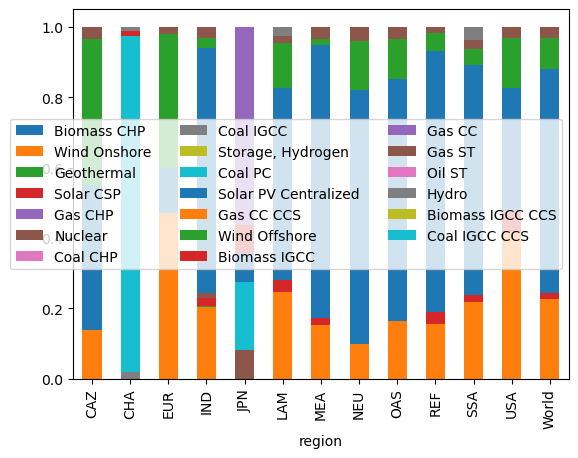

In [15]:
import matplotlib.pyplot as plt
df.loc[(df["year"]==2050), "region":].plot(kind="bar", stacked=True, xlabel="region")
plt.xticks(ticks=range(0, 13), labels=df.loc[(df["year"]==2050), "region"].values.tolist())
plt.legend(ncols=3)